In [1]:
import pandas as pd
import numpy as np
import os, sys
sys.path.insert(0, os.path.abspath('../..'))
import source.data_preparation as dp
import source.regression_models as modl
data = dp.prepare_data(uselog=False)


/opt/anaconda3/envs/tsfm/lib/python3.11/site-packages/openpyxl/worksheet/header_footer.py:48: UserWarning: Cannot parse header or footer so it will be ignored
  warn("""Cannot parse header or footer so it will be ignored""")


Manually calculated R2: -0.027656665855410933


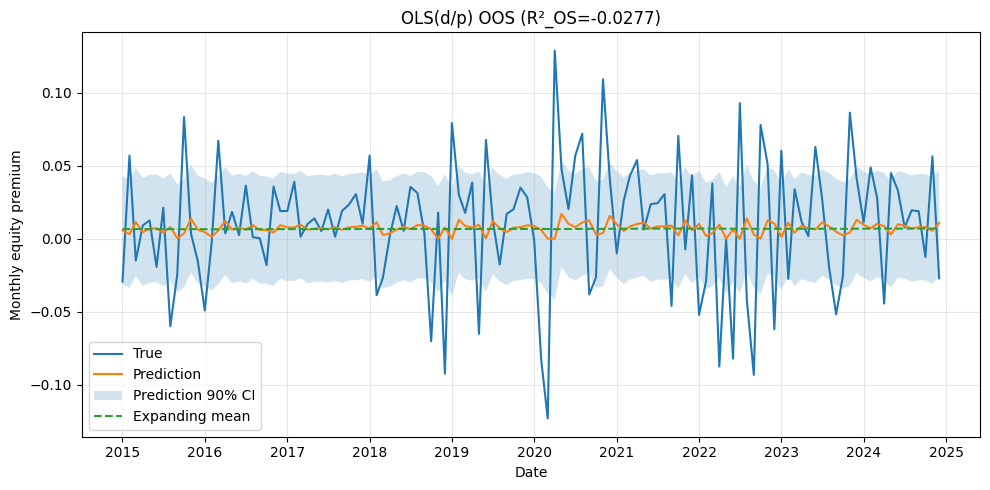

In [2]:
r2_o,stats, y_true_o, y_pred_o, dates_o,y_lower,y_upper,HA_OLS = modl.ols_oos(data, variables=("equity_premium",), start_oos="2015-01-01", ct_cutoff =True, quiet =True, model_name="OLS(d/p)", ci= 0.5)

modl.plot_oos(
    y_true_o, y_pred_o,HA_OLS, y_lower=y_lower,y_upper=y_upper, dates=dates_o,
    title=f"OLS(d/p) OOS (R²_OS={r2_o:.4f})",
    ylabel="Monthly equity premium",
)



In [3]:
# Pick the monthly variables you actually have in `data`:
monthly_vars = [
    "vp","impvar","vrp","lzrt","ogap","wtexas","sntm","ndrbL","skvw","tail",
    "fbm","dtoy","dtoat","ygap","rdsp","rsvix","tchi","avgcor","shtint",
    "disag","ntis","tby","lty","ltr","tms","dfy","dfr","infl","equity_premium", "d/p", "d/y", "e/p", "d/e", "svar", "b/m"
]
monthly_vars = [v for v in monthly_vars if v in data.columns]

ranking = modl.rank_monthly_predictors(
    data,
    monthly_vars=monthly_vars,
    start_date="1927-01-01",
    start_oos="1965-01-01",
    lag=1,
    quiet=True,  # set False to see printed ranking
      ct_cutoff=True,
)

Manually calculated R2: 0.001357064318419754
Manually calculated R2: -0.01700992846694449
Manually calculated R2: 0.00037241378625374466
Manually calculated R2: 0.0002431143118732937
Manually calculated R2: 0.008431210714356818
Manually calculated R2: 0.003789507897984823
Manually calculated R2: 0.0025236028016849543
Manually calculated R2: -0.005471768631891694
Manually calculated R2: -0.0004282714093712947
Manually calculated R2: 0.00036030864695146825
Manually calculated R2: -0.0021476067296053447
Manually calculated R2: 0.0029085449402848074
Manually calculated R2: -0.0052183106741454655
Manually calculated R2: -0.0028725012738535227
Manually calculated R2: -0.02928133134641886
Manually calculated R2: 0.0013255257593922654
Manually calculated R2: 0.004715448270212974
Manually calculated R2: -0.009668136859944276
Manually calculated R2: -0.011068548649251664
Manually calculated R2: -0.009734974690861042
Manually calculated R2: 0.005613886625718489
Manually calculated R2: 0.000250371

In [15]:
from importlib import reload
reload(modl)

<module 'source.regression_models' from '/Users/kilianrunnwerth/Masterarbeit/source/regression_models.py'>

/opt/anaconda3/envs/tsfm/lib/python3.11/site-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/opt/anaconda3/envs/tsfm/lib/python3.11/site-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/opt/anaconda3/envs/tsfm/lib/python3.11/site-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/opt/anaconda3/envs/tsfm/lib/python3.11/site-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/opt/anaconda3/envs/tsfm/lib/python3.11/site-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 

Manually calculated R2: -0.019576694000248196


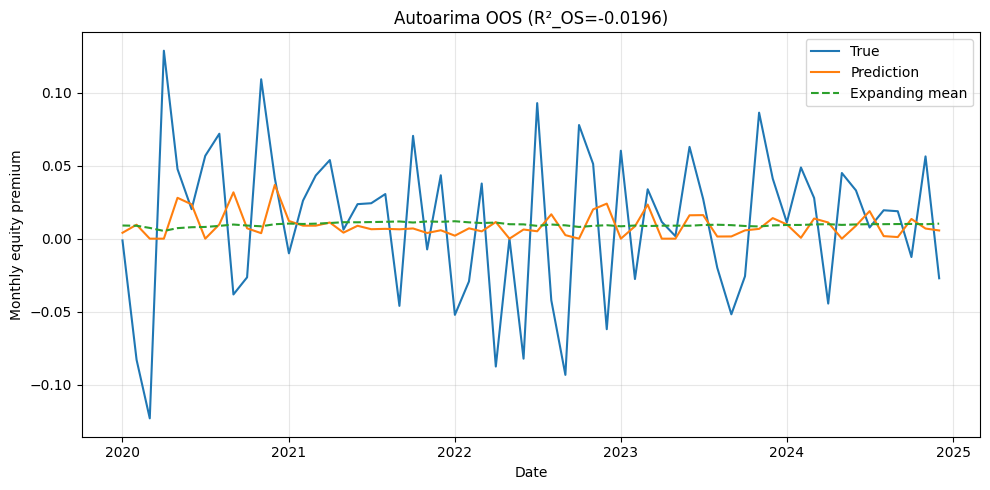

In [12]:
r2_arima, stats_arima, y_true_a, y_pred_a, dates_a, _,_,Ha_arima = modl.autoarima_oos(
    data,
    target_col="equity_premium",
    start_oos="2015-01-01",
    seasonal=False,
    m=1,
    auto_arima_kwargs={"d": 0, "stationary": True},
    quiet=True,
    ct_cutoff=True,
    mode="mean",
)
modl.plot_oos(
    y_true_a, y_pred_a, Ha_arima, dates=dates_a,
    title=f"Autoarima OOS (R²_OS={r2_arima:.4f})",
    ylabel="Monthly equity premium",
)


`torch_dtype` is deprecated! Use `dtype` instead!
`torch_dtype` is deprecated! Use `dtype` instead!


2015-01-01 00:00:00
2015-02-01 00:00:00
2015-03-01 00:00:00
2015-04-01 00:00:00
2015-05-01 00:00:00
2015-06-01 00:00:00
2015-07-01 00:00:00
2015-08-01 00:00:00
2015-09-01 00:00:00
2015-10-01 00:00:00
2015-11-01 00:00:00
2015-12-01 00:00:00
2016-01-01 00:00:00
2016-02-01 00:00:00
2016-03-01 00:00:00
2016-04-01 00:00:00
2016-05-01 00:00:00
2016-06-01 00:00:00
2016-07-01 00:00:00
2016-08-01 00:00:00
2016-09-01 00:00:00
2016-10-01 00:00:00
2016-11-01 00:00:00
2016-12-01 00:00:00
2017-01-01 00:00:00
2017-02-01 00:00:00
2017-03-01 00:00:00
2017-04-01 00:00:00
2017-05-01 00:00:00
2017-06-01 00:00:00
2017-07-01 00:00:00
2017-08-01 00:00:00
2017-09-01 00:00:00
2017-10-01 00:00:00
2017-11-01 00:00:00
2017-12-01 00:00:00
2018-01-01 00:00:00
2018-02-01 00:00:00
2018-03-01 00:00:00
2018-04-01 00:00:00
2018-05-01 00:00:00
2018-06-01 00:00:00
2018-07-01 00:00:00
2018-08-01 00:00:00
2018-09-01 00:00:00
2018-10-01 00:00:00
2018-11-01 00:00:00
2018-12-01 00:00:00
2019-01-01 00:00:00
2019-02-01 00:00:00


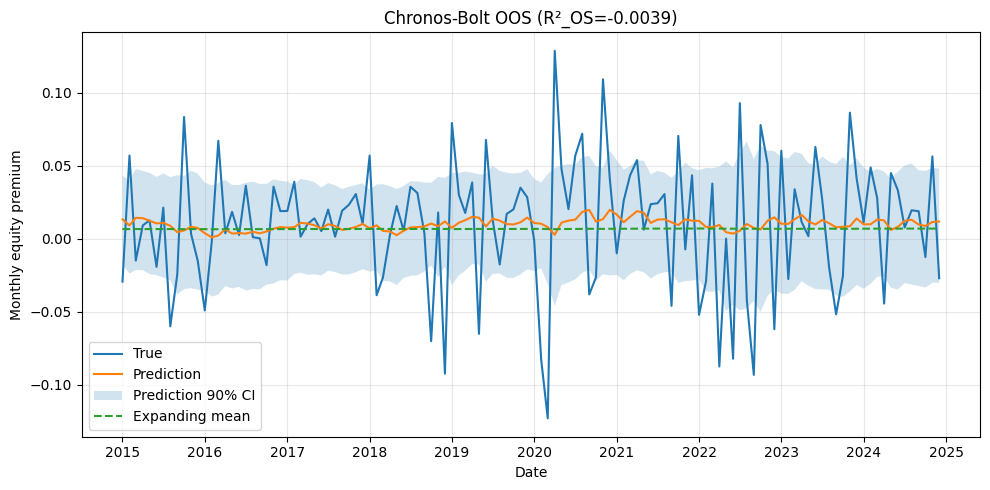

In [13]:

r2_c, stats_c, y_true_c, y_pred_c, dates_c, y_lower, y_upper, HA_c = modl.chronos_oos(
    data, start_oos="2015-01-01", quiet=False, ct_cutoff=True, freq='M', mode="mean", ci=0.8
)
print(r2_c, stats_c)
modl.plot_oos(
    y_true_c, y_pred_c, HA_c, dates=dates_c, y_lower=y_lower, y_upper=y_upper,
    title=f"Chronos-Bolt OOS (R²_OS={r2_c:.4f})",
    ylabel="Monthly equity premium",
)

[Chronos-2] Loading amazon/chronos-2 on M freq with 2 covariates...
2015-01-01 00:00:00
2015-02-01 00:00:00


/opt/anaconda3/envs/tsfm/lib/python3.11/site-packages/torch/utils/data/dataloader.py:692: UserWarning: 'pin_memory' argument is set as true but not supported on MPS now, device pinned memory won't be used.
  warnings.warn(warn_msg)


2015-03-01 00:00:00
2015-04-01 00:00:00
2015-05-01 00:00:00
2015-06-01 00:00:00
2015-07-01 00:00:00
2015-08-01 00:00:00
2015-09-01 00:00:00
2015-10-01 00:00:00
2015-11-01 00:00:00
2015-12-01 00:00:00
2016-01-01 00:00:00
2016-02-01 00:00:00
2016-03-01 00:00:00
2016-04-01 00:00:00
2016-05-01 00:00:00
2016-06-01 00:00:00
2016-07-01 00:00:00
2016-08-01 00:00:00
2016-09-01 00:00:00
2016-10-01 00:00:00
2016-11-01 00:00:00
2016-12-01 00:00:00
2017-01-01 00:00:00
2017-02-01 00:00:00
2017-03-01 00:00:00
2017-04-01 00:00:00
2017-05-01 00:00:00
2017-06-01 00:00:00
2017-07-01 00:00:00
2017-08-01 00:00:00
2017-09-01 00:00:00
2017-10-01 00:00:00
2017-11-01 00:00:00
2017-12-01 00:00:00
2018-01-01 00:00:00
2018-02-01 00:00:00
2018-03-01 00:00:00
2018-04-01 00:00:00
2018-05-01 00:00:00
2018-06-01 00:00:00
2018-07-01 00:00:00
2018-08-01 00:00:00
2018-09-01 00:00:00
2018-10-01 00:00:00
2018-11-01 00:00:00
2018-12-01 00:00:00
2019-01-01 00:00:00
2019-02-01 00:00:00
2019-03-01 00:00:00
2019-04-01 00:00:00


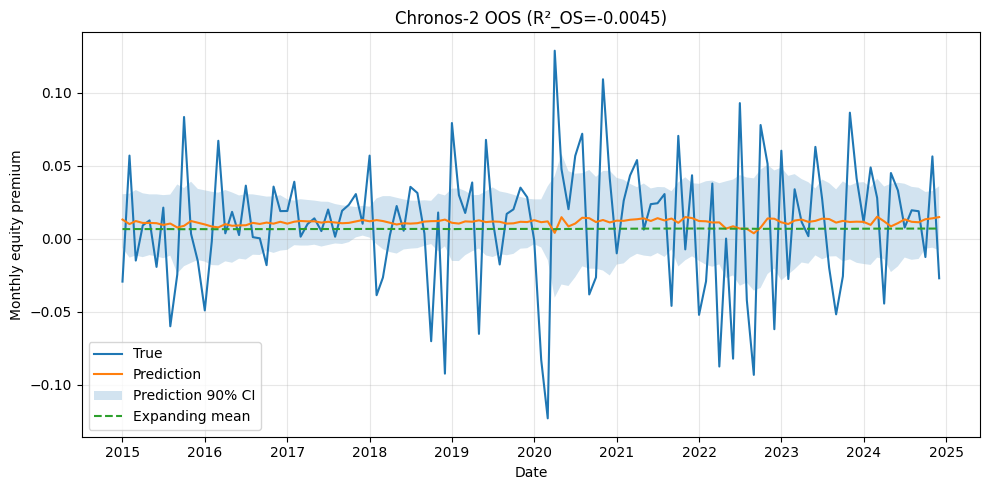

In [20]:
r2_m, stats, y_true_m, y_pred_m, dates_m, y_lower,y_upper,HA_m = modl.chronos2_oos(
    data, covariates=("equity_premium",
    "vp"
    ), start_oos="2015-01-01",
    ctx_min=240, ct_cutoff=True, quiet=False, mode = "mean", freq="M",
    ci = 0.5
)

modl.plot_oos(
    y_true_m, y_pred_m, HA_m, dates=dates_m,y_lower=y_lower, y_upper=y_upper,
    title=f"Chronos-2 OOS (R²_OS={r2_m:.4f})",
    ylabel="Monthly equity premium"
)

[Chronos-2] Loading amazon/chronos-2 on M freq with 27 covariates...
2015-01-01 00:00:00


/opt/anaconda3/envs/tsfm/lib/python3.11/site-packages/torch/utils/data/dataloader.py:692: UserWarning: 'pin_memory' argument is set as true but not supported on MPS now, device pinned memory won't be used.
  warnings.warn(warn_msg)


2015-02-01 00:00:00
2015-03-01 00:00:00
2015-04-01 00:00:00
2015-05-01 00:00:00
2015-06-01 00:00:00
2015-07-01 00:00:00
2015-08-01 00:00:00
2015-09-01 00:00:00
2015-10-01 00:00:00
2015-11-01 00:00:00
2015-12-01 00:00:00
2016-01-01 00:00:00
2016-02-01 00:00:00
2016-03-01 00:00:00
2016-04-01 00:00:00
2016-05-01 00:00:00
2016-06-01 00:00:00
2016-07-01 00:00:00
2016-08-01 00:00:00
2016-09-01 00:00:00
2016-10-01 00:00:00
2016-11-01 00:00:00
2016-12-01 00:00:00
2017-01-01 00:00:00
2017-02-01 00:00:00
2017-03-01 00:00:00
2017-04-01 00:00:00
2017-05-01 00:00:00
2017-06-01 00:00:00
2017-07-01 00:00:00
2017-08-01 00:00:00
2017-09-01 00:00:00
2017-10-01 00:00:00
2017-11-01 00:00:00
2017-12-01 00:00:00
2018-01-01 00:00:00
2018-02-01 00:00:00
2018-03-01 00:00:00
2018-04-01 00:00:00
2018-05-01 00:00:00
2018-06-01 00:00:00
2018-07-01 00:00:00
2018-08-01 00:00:00
2018-09-01 00:00:00
2018-10-01 00:00:00
2018-11-01 00:00:00
2018-12-01 00:00:00
2019-01-01 00:00:00
2019-02-01 00:00:00
2019-03-01 00:00:00


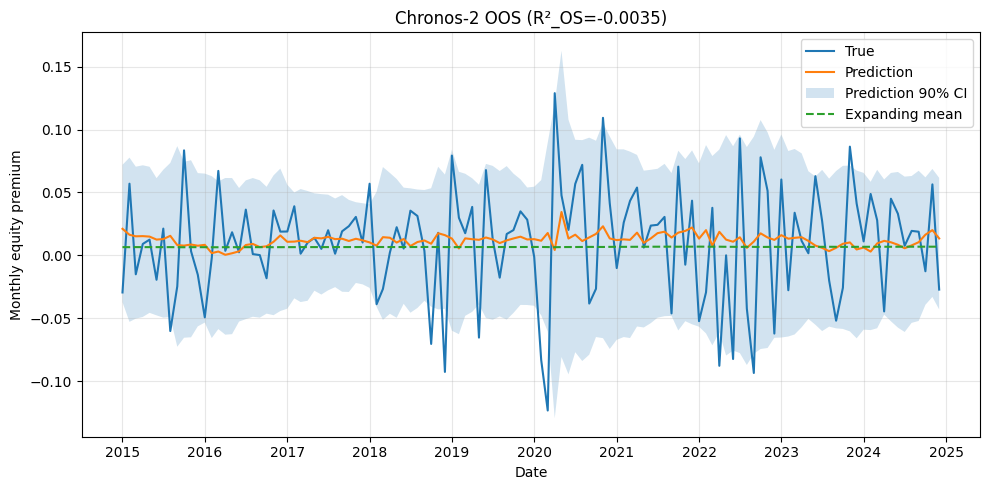

In [ ]:
r2_m, stats, y_true_m, y_pred_m, dates_m, y_lower, y_upper, HA_m = modl.chronos2_oos(
    data, covariates=("equity_premium",
    "vp","impvar","vrp","lzrt","ogap","wtexas","sntm","skvw","tail",
    "fbm","dtoy","dtoat","ygap","rdsp","rsvix","tchi","avgcor","shtint",
    "disag","ntis","lty","ltr","tms","dfy","dfr","infl"
    ), start_oos="2015-01-01",
    ctx_min=256, ct_cutoff=True, quiet=False, mode = "mean", freq="M"
)

modl.plot_oos(
    y_true_m, y_pred_m, HA_m, dates=dates_m, y_lower=y_lower, y_upper=y_upper,
    title=f"Chronos-2 OOS (R²_OS={r2_m:.4f})",
    ylabel="Monthly equity premium"
)

2018-01-01 00:00:00
2018-02-01 00:00:00
2018-03-01 00:00:00
2018-04-01 00:00:00
2018-05-01 00:00:00
2018-06-01 00:00:00
2018-07-01 00:00:00
2018-08-01 00:00:00
2018-09-01 00:00:00
2018-10-01 00:00:00
2018-11-01 00:00:00
2018-12-01 00:00:00
2019-01-01 00:00:00
2019-02-01 00:00:00
2019-03-01 00:00:00
2019-04-01 00:00:00
2019-05-01 00:00:00
2019-06-01 00:00:00
2019-07-01 00:00:00
2019-08-01 00:00:00
2019-09-01 00:00:00
2019-10-01 00:00:00
2019-11-01 00:00:00
2019-12-01 00:00:00
2020-01-01 00:00:00
2020-02-01 00:00:00
2020-03-01 00:00:00
2020-04-01 00:00:00
2020-05-01 00:00:00
2020-06-01 00:00:00
2020-07-01 00:00:00
2020-08-01 00:00:00
2020-09-01 00:00:00
2020-10-01 00:00:00
2020-11-01 00:00:00
2020-12-01 00:00:00
2021-01-01 00:00:00
2021-02-01 00:00:00
2021-03-01 00:00:00
2021-04-01 00:00:00
2021-05-01 00:00:00
2021-06-01 00:00:00
2021-07-01 00:00:00
2021-08-01 00:00:00
2021-09-01 00:00:00
2021-10-01 00:00:00
2021-11-01 00:00:00
2021-12-01 00:00:00
2022-01-01 00:00:00
2022-02-01 00:00:00


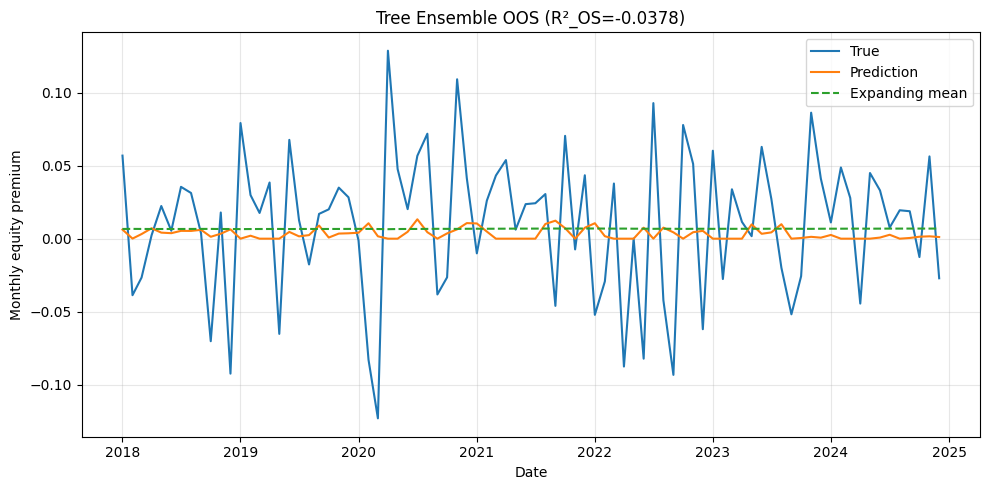

In [22]:
vars_gw = ['d/p','d/y','e/p','tms','dfy','dfr','tbl','ltr','infl','svar','b/m','ntis','cay']
vars_core = ['d/p','e/p','tms','dfy','tbl','ltr','infl','svar','cay']

xgb_params = dict(
    n_estimators=1200, max_depth=2, learning_rate=0.01,
    subsample=0.7, colsample_bytree=0.7, reg_lambda=2.0,
    objective="reg:squarederror", random_state=42
)
r2_t, stats, y_true_t, y_pred_t, dates_t,_,_, HA_t = modl.tree_ensemble_oos(data,start_oos="2018-01-01", variables=vars_core, ct_cutoff=True, model_params=xgb_params, mode = "mean")

    
modl.plot_oos(
    y_true_t, y_pred_t, HA_t, dates=dates_t,
    title=f"Tree Ensemble OOS (R²_OS={r2_t:.4f})",
    ylabel="Monthly equity premium"
)

[Moirai2] Using freq='M' (month-end) | ctx=240 | H=1


/Users/kilianrunnwerth/Masterarbeit/source/regression_models.py:542: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  df = df.sort_index().asfreq(FREQ_STR)


2015-01-31 00:00:00
2015-02-28 00:00:00
2015-03-31 00:00:00
2015-04-30 00:00:00
2015-05-31 00:00:00
2015-06-30 00:00:00
2015-07-31 00:00:00
2015-08-31 00:00:00
2015-09-30 00:00:00
2015-10-31 00:00:00
2015-11-30 00:00:00


/opt/anaconda3/envs/tsfm/lib/python3.11/site-packages/gluonts/dataset/common.py:254: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  ProcessDataEntry(to_offset(freq), one_dim_target, use_timestamp),


2015-12-31 00:00:00
2016-01-31 00:00:00
2016-02-29 00:00:00
2016-03-31 00:00:00
2016-04-30 00:00:00
2016-05-31 00:00:00
2016-06-30 00:00:00
2016-07-31 00:00:00
2016-08-31 00:00:00
2016-09-30 00:00:00
2016-10-31 00:00:00
2016-11-30 00:00:00
2016-12-31 00:00:00
2017-01-31 00:00:00
2017-02-28 00:00:00
2017-03-31 00:00:00
2017-04-30 00:00:00
2017-05-31 00:00:00
2017-06-30 00:00:00
2017-07-31 00:00:00
2017-08-31 00:00:00
2017-09-30 00:00:00
2017-10-31 00:00:00
2017-11-30 00:00:00
2017-12-31 00:00:00
2018-01-31 00:00:00
2018-02-28 00:00:00
2018-03-31 00:00:00
2018-04-30 00:00:00
2018-05-31 00:00:00
2018-06-30 00:00:00
2018-07-31 00:00:00
2018-08-31 00:00:00
2018-09-30 00:00:00
2018-10-31 00:00:00
2018-11-30 00:00:00
2018-12-31 00:00:00
2019-01-31 00:00:00
2019-02-28 00:00:00
2019-03-31 00:00:00
2019-04-30 00:00:00
2019-05-31 00:00:00
2019-06-30 00:00:00
2019-07-31 00:00:00
2019-08-31 00:00:00
2019-09-30 00:00:00
2019-10-31 00:00:00
2019-11-30 00:00:00
2019-12-31 00:00:00
2020-01-31 00:00:00


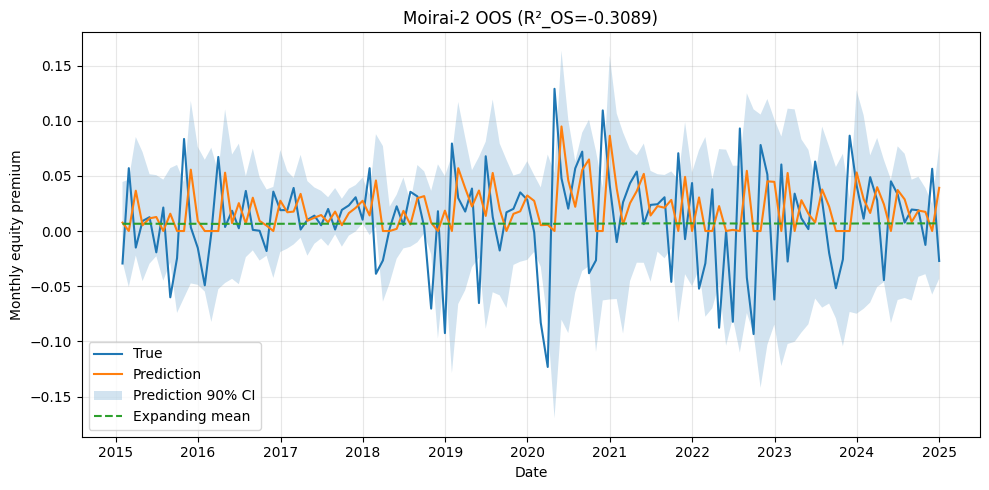

In [27]:
r2_m, stats, y_true_m, y_pred_m, dates_m,y_lower,y_upper, HA_m = modl.moirai2_oos(
    data, covariates=("d/p","tms","dfy"), start_oos="2015-01-01",
    ctx=240, device="cpu", ct_cutoff=True, quiet=False, ci=0.9
)

modl.plot_oos(
    y_true_m, y_pred_m, HA_m, dates=dates_m,y_lower=y_lower, y_upper=y_upper,
    title=f"Moirai-2 OOS (R²_OS={r2_m:.4f})",
    ylabel="Monthly equity premium"
)

In [ ]:
r2_tabpfn, y_true_tabpfn, y_pred_tabpfn, dates_tabpfn = modl.tabpfn_oos_fit_each_step(
    data,
    variables=("d/p", "tms", "dfy"),
    start_oos="1965-01-01",
    lag=1,
    min_train=120,
    ct_cutoff=True,
    quiet=False,
    model_params='2.5',  # or just omit this argument,
    )




In [ ]:
r2, y_true, y_pred, dates = modl.tabpfn_advanced_ts_oos(
    data,
    variables=("d/p", "tms", "dfy"),
    target_col="equity_premium",
    lag=3,                  # Use t-1, t-2, t-3
    autoregressive=True,    # Use past returns
    start_oos="1965-01-01",
    model_params = "121"
)

In [ ]:
modl.plot_oos(
    y_true_tabpfn, y_pred_tabpfn, dates=dates_tabpfn,
    title=f"TabPFN (fit each step) OOS (R²_OS={r2_tabpfn:.4f})",
    ylabel="Monthly equity premium"
)

In [ ]:
r2_pfn_ts, y_true_pfn_ts, y_pred_pfn_ts, dates_pfn_ts = modl.tabpfn_ts_oos_fit_each_step(
    data,
    target_col="equity_premium",
    start_oos="1965-01-01",
    ctx=240,
    freq="M",
    min_windows=120,
    ct_cutoff=False,
    quiet=False,
    fit_kwargs={"epochs": 1}  # if your build supports epochs
)

plot_oos(
    y_true_pfn_ts, y_pred_pfn_ts, dates=dates_pfn_ts,
    title=f"TabPFN-TS (fit each step) OOS (R²_OS={r2_pfn_ts:.4f})",
    ylabel="Monthly equity premium"
)


In [ ]:

r2_c, stats_c, y_true_c, y_pred_c, dates_c = modl.chronos_oos(
    data, start_oos="2015-01-01", quiet=False, ct_cutoff=True, freq='M', mode="mean", model_id="amazon/chronos-bolt-base"
)
print(r2_c, stats_c)
modl.plot_oos(
    y_true_c, y_pred_c, dates=dates_c,
    title=f"Chronos-Bolt OOS (R²_OS={r2_c:.4f})",
    ylabel="Monthly equity premium",
    mode="mean"
)

In [ ]:
r2_m, y_true_m, y_pred_m, dates_m = modl.moirai2_oos(
    data, covariates=(), start_oos="1965-01-01",
    ctx=240, device="cpu", ct_cutoff=True, quiet=False, mode = "mean"
)

modl.plot_oos(
    y_true_m, y_pred_m, dates=dates_m,
    title=f"Moirai-2 OOS (R²_OS={r2_m:.4f})",
    ylabel="Monthly equity premium", mode = "mean"
)